In [ ]:
Using Titanic data set
Helps to understand basics of Pandas Series and dataframe ,basic operations that can be performed on 
indexing(loc,iloc) conditional selection

In [155]:

import pandas as pd
import numpy as np
import seaborn as sns
import statistics
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
df=pd.read_csv("titanic.csv")

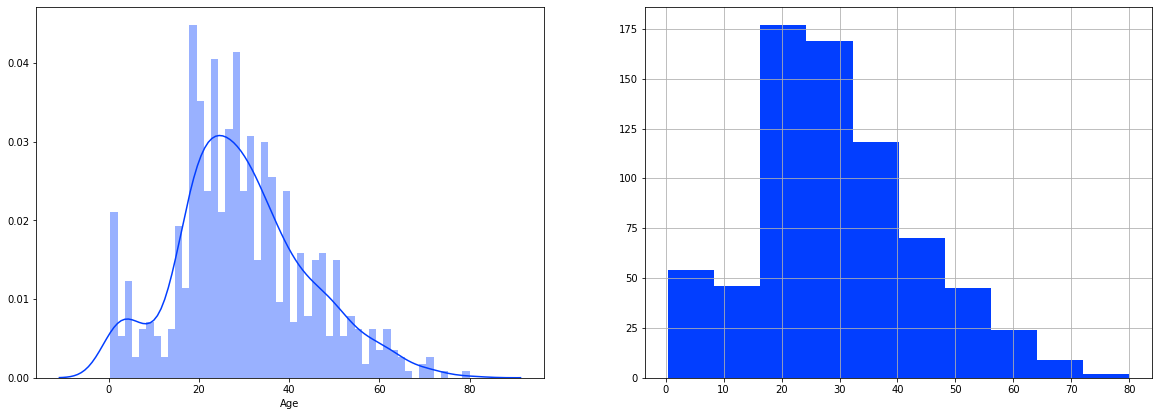

In [15]:
#What is the age distribution of the passengers?
#df['Age'].hist()
sns.set_palette("bright")
plt.figure(figsize= (20,15))
plt.subplot(2,2,1)#plot using seaborn
sns.distplot(df["Age"],bins=50)
plt.subplot(2,2,2)#plot using pyplt
df['Age'].hist()

In [60]:
#How does the survival rate of the passengers differ between sexes?
#df.groupby('Sex')[['Survived']].aggregate(lambda x: x.sum() / len(x))
female=df[df['Survived']==1]['Sex'].value_counts()[0]/df['Sex'].value_counts()[1]
male=df[df['Survived']==1]['Sex'].value_counts()[1]/df['Sex'].value_counts()[0]
print("survival rate_male-"+ str(male))
print("survival rate_female-"+ str(female))

survival rate_male-0.18890814558058924
survival rate_female-0.7420382165605095


In [83]:
#Or how does the survival rate differ between the different classes of the Titanic
df.groupby("Pclass").agg()
#df.groupby('Pclass')['Survived'].aggregate(lambda x: x.sum() / len(x)).plot(kind='bar')

TypeError: aggregate() missing 1 required positional argument: 'arg'

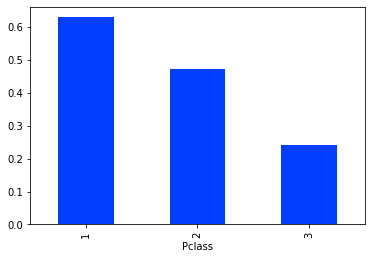

In [84]:
df.groupby('Pclass')['Survived'].aggregate(lambda x: x.sum() / len(x)).plot(kind='bar')

In [91]:
#Are young people (e.g. < 25 years) likely to survive?

In [105]:
df[df['Age']<=25]["Survived"].sum()/df[df['Age']<=25]["Survived"].count()

0.4119601328903654

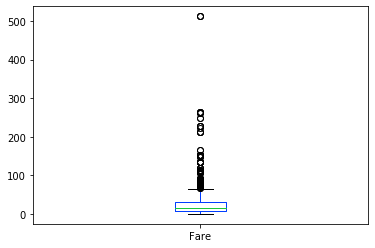

In [112]:
df['Fare'].plot(kind="box")

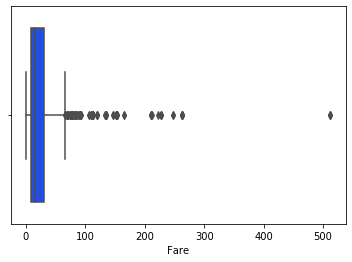

In [113]:
sns.boxplot(df['Fare'])

In [121]:
#Sort the rows of the DataFrame by 'Age' column, with the oldest passenger at the top. 
df.sort_values(by="Age",ascending=False).head()
#df.sort_values(by='Age', ascending=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q


In [131]:
#What is the average age of the passengers?
df['Age'].mean()

29.69911764705882

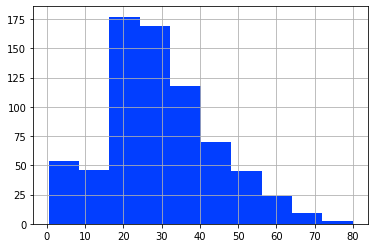

In [132]:
#Plot the age distribution of the titanic passengers
df['Age'].hist()

In [133]:
#Max Fare and median
df['Fare'].max()

512.3292

In [134]:
df['Fare'].median()

14.4542

In [144]:
#75th quantile of fare
#df.describe()['Fare'][6]
df['Fare'].quantile(.75)

31.0

In [162]:
#Calculate the normalized Fares (normalized relative to its mean)
#mean=df['Fare'].mean()
#stdev=df['Fare'].std()
df['Fare_zscore']=df['Fare'].apply(lambda x : (x-df.Fare.mean())/df.Fare.std())


In [163]:
population = pd.Series({'Germany': 81.3, 'Belgium': 11.3, 'France': 64.3, 
                        'United Kingdom': 64.9, 'Netherlands': 16.9})

In [169]:
#population.isin?
population.isin(["France"])

Germany           False
Belgium           False
France            False
United Kingdom    False
Netherlands       False
dtype: bool

In [211]:
# dataframe
data = {'country': ['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'],
        'population': [11.3, 64.3, 81.3, 16.9, 64.9],
        'area': [30510, 671308, 357050, 41526, 244820],
        'capital': ['Brussels', 'Paris', 'Berlin', 'Amsterdam', 'London']}
countries = pd.DataFrame(data)

In [171]:
s=countries['capital']

In [172]:
s.isin(['Berlin', 'London'])

0    False
1    False
2     True
3    False
4     True
Name: capital, dtype: bool

In [185]:
#Select all rows for male passengers and calculate the mean age of those passengers.
#Do the same for the female passengers.
df[df['Sex']=='male']['Age'].mean()
df[df['Sex'].str.startswith("fe")]['Age'].mean()# a new method 
df.groupby('Sex')['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [182]:
#How many passengers older than 70 were on the Titanic?
len(df[df['Age']>70])

5

In [199]:
#Select the passengers that are between 30 and 40 years old?
df[(df['Age']>=30) & (df['Age']<40)].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_zscore,Surname
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.786404,Cumings
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.420494,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,-0.486064,Allen
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S,-0.018699,Andersson
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S,-0.285837,Vander Planke


In [197]:
df['Surname']=df['Name'].apply(lambda x : x.split(",")[0])

In [198]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_zscore,Surname
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,-0.502163,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.786404,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,-0.488580,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.420494,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,-0.486064,Allen


In [202]:
df[df['Surname'].str.startswith('Williams')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_zscore,Surname
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,-0.386454,Williams
155,156,0,1,"Williams, Mr. Charles Duane",male,51.0,0,1,PC 17597,61.3792,NaN,C,0.587100,Williams
304,305,0,3,"Williams, Mr. Howard Hugh ""Harry""",male,NaN,0,0,A/5 2466,8.0500,NaN,S,-0.486064,Williams
351,352,0,1,"Williams-Lambert, Mr. Fletcher Fellows",male,NaN,0,0,113510,35.0000,C128,S,0.056261,Williams-Lambert
735,736,0,3,"Williams, Mr. Leslie",male,28.5,0,0,54636,16.1000,NaN,S,-0.324071,Williams


In [208]:
df[df['Surname'].apply(lambda x: len(x)>15)]
#df[df['Surname'].str.len() > 15]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_zscore,Surname
307,308,1,1,"Penasco y Castellana, Mrs. Victor de Satode (M...",female,17.0,1,0,PC 17758,108.9000,C65,C,1.543379,Penasco y Castellana
351,352,0,1,"Williams-Lambert, Mr. Fletcher Fellows",male,NaN,0,0,113510,35.0000,C128,S,0.056261,Williams-Lambert
430,431,1,1,"Bjornstrom-Steffansson, Mr. Mauritz Hakan",male,28.0,0,0,110564,26.5500,C52,S,-0.113782,Bjornstrom-Steffansson
444,445,1,3,"Johannesen-Bratthammer, Mr. Bernt",male,NaN,0,0,65306,8.1125,NaN,S,-0.484807,Johannesen-Bratthammer
505,506,0,1,"Penasco y Castellana, Mr. Victor de Satode",male,18.0,1,0,PC 17758,108.9000,C65,C,1.543379,Penasco y Castellana
587,588,1,1,"Frolicher-Stehli, Mr. Maxmillian",male,60.0,1,1,13567,79.2000,B41,C,0.945714,Frolicher-Stehli
632,633,1,1,"Stahelin-Maeglin, Dr. Max",male,32.0,0,0,13214,30.5000,B50,C,-0.034294,Stahelin-Maeglin


In [209]:
countries.iloc[0:2,1:3]

,population,area
0,11.3,30510
1,64.3,671308


In [ ]:

countries.loc['France':'Germany', ['area', 'population']]

In [213]:
countries = pd.DataFrame(data)
countries

,country,population,area,capital
0,Belgium,11.3,30510,Brussels
1,France,64.3,671308,Paris
2,Germany,81.3,357050,Berlin
3,Netherlands,16.9,41526,Amsterdam
4,United Kingdom,64.9,244820,London


In [220]:
countries.loc[0:2, ['area', 'population']]

,area,population
0,30510,11.3
1,671308,64.3
2,357050,81.3


In [221]:
countries = countries.set_index('country')

In [222]:
countries.loc['France':'Germany', ['area', 'population']]

,area,population
country,,
France,671308,64.3
Germany,357050,81.3


In [223]:
countries.head()

,population,area,capital
country,,,
Belgium,11.3,30510,Brussels
France,64.3,671308,Paris
Germany,81.3,357050,Berlin
Netherlands,16.9,41526,Amsterdam
United Kingdom,64.9,244820,London


In [228]:
countries['populationdensity']=countries['population']*1000000/countries['area']

In [229]:
countries['density_ratio']=countries['populationdensity']/countries['populationdensity'].mean()

In [234]:
countries[countries['populationdensity']>300][['capital','population']]

,capital,population
country,,
Belgium,Brussels,11.3
Netherlands,Amsterdam,16.9


In [237]:
countries.loc['United Kingdom','capital']='Cambridge'

In [241]:
#Select all countries whose population density is between 100 and 300 people/km²
countries.loc[(countries['populationdensity']>=100) & (countries['populationdensity']<300)]

,population,area,capital,populationdensity,density_ratio
country,,,,,
Germany,81.3,357050,Berlin,227.699202,0.833502
United Kingdom,64.9,244820,Cambridge,265.092721,0.970382


In [242]:
population = countries['population']
s1 = population[['Belgium', 'France']]
s2 = population[['France', 'Germany']]

In [243]:
s1+s2

country
Belgium      NaN
France     128.6
Germany      NaN
Name: population, dtype: float64

In [255]:
#Select all rows for male and female passengers and calculate the mean age of those passengers
df.loc[df['Sex']=='male']['Age'].mean()
df.loc[df['Sex']=='female','Age'].mean()

27.915708812260537